In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import datetime as dt
import matplotlib.pyplot as plt
import plotly.express as px

In [25]:
training_df = pd.read_csv('final_dataset.csv')
pred = pd.read_csv('predicted_closes.csv')

In [26]:
training_df

,Date,Close_AAPL,High_AAPL,Low_AAPL,Open_AAPL,Volume_AAPL,Close_MSFT,High_MSFT,Low_MSFT,Open_MSFT,...,AAPL_Rating_Change,AVGO_Rating_Change,CRM_Rating_Change,CSCO_Rating_Change,IBM_Rating_Change,MSFT_Rating_Change,NOW_Rating_Change,NVDA_Rating_Change,ORCL_Rating_Change,PLTR_Rating_Change
0,2023-04-24,163.679352,163.946660,162.253726,163.352645,41949600,277.358734,280.488972,274.356495,277.673732,...,1,1,1,1,1,1,1,1,1,1
1,2023-04-25,162.134933,164.649568,162.095324,163.540754,48714100,271.108154,277.191396,271.058919,275.134119,...,1,1,1,1,1,0,1,1,1,1
2,2023-04-26,162.125000,163.629828,161.174593,161.431992,45498800,290.745819,294.880078,288.147165,292.055014,...,1,1,1,1,1,1,1,1,1,1
3,2023-04-27,166.728592,166.877088,163.540739,163.540739,64902300,300.057709,300.421941,290.627702,291.336431,...,0,1,1,1,1,1,1,1,1,1
4,2023-04-28,167.985916,168.154232,166.203899,166.807810,55209200,302.449707,304.093546,298.561534,299.250587,...,0,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,2025-04-15,202.139999,203.509995,199.800003,201.860001,51343900,385.730011,391.890015,384.160004,388.510010,...,1,1,1,1,1,0,0,1,0,1
497,2025-04-16,194.270004,200.699997,192.369995,198.360001,59732400,371.609985,381.609985,368.000000,380.670013,...,1,0,0,1,1,0,0,0,0,0
498,2025-04-17,196.979996,198.830002,194.419998,197.199997,51334300,367.779999,374.320007,366.890015,373.750000,...,1,1,1,0,1,1,1,0,1,1
499,2025-04-21,193.160004,193.800003,189.809998,193.270004,46742500,359.119995,364.480011,355.670013,362.820007,...,1,1,1,1,1,0,0,1,1,1


In [27]:
pred

,Stock,Predicted_Close
0,AAPL,196.491458
1,AVGO,166.716613
2,CRM,237.810313
3,CSCO,55.153815
4,IBM,238.841816
5,MSFT,364.194600
6,NOW,762.108975
7,NVDA,98.536683
8,ORCL,124.279114
9,PLTR,93.434661


In [38]:
pred_date = pd.to_datetime(training_df['Date'].max())+ dt.timedelta(days=2)

In [39]:
pred_date

Timestamp('2025-04-24 00:00:00')

In [31]:
from Features.feature_engg import get_unique_stocks
ticker_list = get_unique_stocks()

In [44]:
actual_data = yf.download(tickers=ticker_list,start=pred_date-dt.timedelta(days=10), end=dt.date.today(), period='1d')

[*********************100%***********************]  10 of 10 completed


In [45]:
actual_data

Price            Close                                                 \
Ticker            AAPL        AVGO         CRM       CSCO         IBM   
Date                                                                    
2025-04-14  202.520004  178.360001  254.550003  57.410000  239.059998   
2025-04-15  202.139999  178.949997  254.929993  57.200001  240.699997   
2025-04-16  194.270004  174.610001  249.839996  55.759998  238.570007   
2025-04-17  196.979996  170.990005  247.259995  55.759998  238.809998   
2025-04-21  193.160004  166.210007  236.259995  54.369999  236.220001   
2025-04-22  199.740005  169.580002  243.389999  55.040001  240.899994   
2025-04-23  204.600006  176.910004  250.479996  55.630001  245.479996   
2025-04-24  208.369995  188.149994  264.700012  56.290001  229.330002   
2025-04-25  209.279999  192.309998  267.850006  56.709999  232.410004   
2025-04-28  210.139999  192.470001  265.640015  56.840000  236.160004   
2025-04-29  211.701202  192.639999  268.000000  57.439999  239.774994   

Price                                                                   ...  \
Ticker            MSFT         NOW        NVDA        ORCL        PLTR  ...   
Date                                                                    ...   
2025-04-14  387.809998  799.820007  110.709999  134.639999   92.620003  ...   
2025-04-15  385.730011  816.500000  112.199997  133.940002   98.400002  ...   
2025-04-16  371.609985  796.659973  104.489998  129.759995   92.709999  ...   
2025-04-17  367.779999  772.159973  101.489998  128.619995   93.779999  ...   
2025-04-21  359.119995  755.989990   96.910004  122.820000   90.800003  ...   
2025-04-22  366.820007  766.830017   98.889999  127.239998   93.989998  ...   
2025-04-23  374.390015  812.700012  102.709999  131.399994  100.820000  ...   
2025-04-24  387.299988  938.570007  106.430000  137.509995  107.779999  ...   
2025-04-25  391.850006  945.260010  111.010002  138.490005  112.779999  ...   
2025-04-28  391.160004  937.409973  108.730003  140.139999  114.650002  ...   
2025-04-29  393.800110  940.715027  109.824997  140.889999  115.599998  ...   

Price          Volume                                                   \
Ticker           AAPL      AVGO      CRM      CSCO       IBM      MSFT   
Date                                                                     
2025-04-14  101352900  25748300  6038100  15657700   3321500  19251200   
2025-04-15   51343900  17242400  5227700  18543600   3363700  17199900   
2025-04-16   59732400  34638600  7190900  20551300   4869900  21967800   
2025-04-17   51334300  22501800  5564400  15874300   4626900  20943700   
2025-04-21   46742500  23469800  9240000  15578800   4908900  20807300   
2025-04-22   52976400  18504900  7145300  19961800   4232700  19485000   
2025-04-23   52929200  24380500  5818900  30231500   7948300  20545500   
2025-04-24   47311000  27576900  7857600  22782300  15428100  22232300   
2025-04-25   38222300  21242300  5651700  16493500   6700100  18973200   
2025-04-28   38652400  16362900  4968800  23101700   3646700  16536000   
2025-04-29   19137282   5713257  1847824   4864145   1935056   6482696   

Price                                                
Ticker          NOW       NVDA      ORCL       PLTR  
Date                                                 
2025-04-14  1717000  264705000   8217700  122836900  
2025-04-15  1735200  228966900   8630000  118457700  
2025-04-16  1869500  397016900   8295200  121997600  
2025-04-17  1803900  290833400   8919500   83991800  
2025-04-21  1668700  288501100  12201200   83831100  
2025-04-22  1582800  241004800  11233700   91185400  
2025-04-23  3019200  247526000   9528900  112909500  
2025-04-24  6083100  220815000   7305900  103190700  
2025-04-25  2887800  251064700   5476400  103933800  
2025-04-28  2049200  207051900   6970400  110664900  
2025-04-29   667456  102127146   2056435   58104988  

[11 rows x 50 columns]

In [2]:
from datasets import load_dataset
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [3]:
tickers = {
    "AAPL", "MSFT", "NVDA", "AVGO", "ORCL",
    "PLTR", "CRM", "CSCO", "IBM", "NOW"
}

print("Loading FNSPID dataset...")
dataset = load_dataset("Zihan1004/FNSPID", split="train", streaming=True)

small_sample = []
count = 0

print("Filtering data by ticker and date range...")
for row in dataset:
    try:
        date_str = row["Date"][:10]
        if "2023-05-01" <= date_str <= "2025-04-28" and row["Stock_symbol"] in tickers:
            small_sample.append(row)
            count += 1
    except KeyError:
        continue

print(f"Collected {len(small_sample)} matching rows.")

df = pd.DataFrame(small_sample)
df.to_csv("sentiment_data.csv", index=False)
print("Saved filtered data to 'sentiment_data.csv'")

Loading FNSPID dataset...


Repo card metadata block was not found. Setting CardData to empty.


Filtering data by ticker and date range...


'(ReadTimeoutError("HTTPSConnectionPool(host='huggingface.co', port=443): Read timed out. (read timeout=10)"), '(Request ID: 27e3b1d6-e1b5-48a0-b0d9-9a899192c258)')' thrown while requesting GET https://huggingface.co/datasets/Zihan1004/FNSPID/resolve/bf9189c41527198897d1af3e17b1a0095279fc45/Stock_news/All_external.csv
Retrying in 1s [Retry 1/5].
'(ReadTimeoutError("HTTPSConnectionPool(host='huggingface.co', port=443): Read timed out. (read timeout=10)"), '(Request ID: 9360d0fe-8805-47d3-a4e8-23ba9ef797c6)')' thrown while requesting GET https://huggingface.co/datasets/Zihan1004/FNSPID/resolve/bf9189c41527198897d1af3e17b1a0095279fc45/Stock_news/All_external.csv
Retrying in 1s [Retry 1/5].
'(ReadTimeoutError("HTTPSConnectionPool(host='huggingface.co', port=443): Read timed out. (read timeout=10)"), '(Request ID: d3bb217a-90a6-445f-be6b-855779a3ce99)')' thrown while requesting GET https://huggingface.co/datasets/Zihan1004/FNSPID/resolve/bf9189c41527198897d1af3e17b1a0095279fc45/Stock_news/n

Collected 14947 matching rows.
Saved filtered data to 'sentiment_data.csv'


In [28]:
input_path = "sentiment_data.csv"
output_path = "sentiment_score.csv"

print(f"Loading: {input_path}")
df = pd.read_csv(input_path)

print("Initializing VADER sentiment analyzer...")
analyzer = SentimentIntensityAnalyzer()

def get_sentiment(text):
    if pd.isna(text):
        return 0.0
    return analyzer.polarity_scores(str(text))["compound"]

def classify(score):
    if score >= 0.05:
        return "positive"
    elif score <= -0.05:
        return "negative"
    else:
        return "neutral"

print("Calculating sentiment scores...")
df["sentiment_score"] = df["Article_title"].apply(get_sentiment)
df["sentiment_label"] = df["sentiment_score"].apply(classify)

df.to_csv(output_path, index=False)
print(f"Saved with sentiment to '{output_path}'")

Loading: sentiment_data.csv
Initializing VADER sentiment analyzer...
Calculating sentiment scores...
Saved with sentiment to 'sentiment_score.csv'


In [9]:
final_df = pd.read_csv('final_dataset.csv')
sentiment_df = pd.read_csv('sentiment_score.csv')

In [10]:
# 1. Make sure Date is datetime and stripped to date only
sentiment_df["Date"] = pd.to_datetime(sentiment_df["Date"]).dt.date
final_df["Date"] = pd.to_datetime(final_df["Date"]).dt.date

# 2. Group by date and ticker to average sentiment
avg_sentiment = sentiment_df.groupby(["Date", "Stock_symbol"])["sentiment_score"].mean().reset_index()

# 3. Pivot to wide format
sentiment_pivot = avg_sentiment.pivot(index="Date", columns="Stock_symbol", values="sentiment_score")
sentiment_pivot.columns = [f"sentiment_{col}" for col in sentiment_pivot.columns]

# 4. Merge into final dataset
merged_df = pd.merge(final_df, sentiment_pivot, on="Date", how="left")


In [11]:
merged_df.head(107)


,Date,Close_AAPL,High_AAPL,Low_AAPL,Open_AAPL,Volume_AAPL,Close_MSFT,High_MSFT,Low_MSFT,Open_MSFT,...,PLTR_vs_SP500_Ratio,PLTR_vs_NASDAQ_Ratio,sentiment_AAPL,sentiment_AVGO,sentiment_CRM,sentiment_IBM,sentiment_MSFT,sentiment_NOW,sentiment_NVDA,sentiment_ORCL
0,2023-05-19,173.651062,174.870462,173.432956,174.870462,55772400,314.041199,314.445666,312.097800,312.462799,...,0.002793,0.000925,0.084569,NaN,0.083333,NaN,0.126291,0.416800,0.138600,0.000000
1,2023-05-22,172.699310,173.204926,171.955771,172.481204,43570900,316.842865,318.233828,313.715689,314.297718,...,0.002824,0.000931,0.012481,NaN,0.101600,NaN,0.093785,0.000000,0.008995,0.178225
2,2023-05-23,170.082077,171.886406,169.804490,171.638559,50747300,311.002808,318.362061,310.992933,315.708384,...,0.003049,0.001006,0.025904,NaN,0.106067,NaN,0.083786,0.133725,0.075600,0.015225
3,2023-05-24,170.359634,170.934640,169.051014,169.616095,45143500,309.611847,312.226056,308.388571,310.479968,...,0.002972,0.000980,0.180300,NaN,0.000000,NaN,0.030621,0.000000,-0.025081,0.000000
4,2023-05-25,171.499771,172.401920,170.210967,170.924766,56058300,321.518860,322.485607,315.678789,318.875027,...,0.003093,0.001011,0.071630,NaN,0.000000,NaN,0.027760,0.179500,0.017621,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,2023-10-16,177.419647,177.777028,175.225720,175.463980,52517000,328.842896,332.302943,326.826174,327.271019,...,0.003969,0.001279,0.135992,NaN,0.067433,NaN,0.125416,NaN,0.147954,0.000000
103,2023-10-17,175.861069,177.121833,173.528176,175.364707,57549400,328.269470,329.653483,323.672557,325.827665,...,0.004079,0.001318,0.125341,NaN,0.000000,NaN,0.121812,0.296000,0.129829,0.401900
104,2023-10-18,174.560577,176.287923,173.835893,174.302475,54764400,326.341705,331.759161,324.552369,328.694542,...,0.003986,0.001292,0.243056,NaN,0.106975,NaN,0.115900,0.072240,0.017316,0.000000
105,2023-10-19,174.183365,176.546038,173.915325,174.759131,59302900,327.537964,333.034494,327.132640,328.358476,...,0.003988,0.001294,0.191756,NaN,0.190900,NaN,0.172805,0.180767,0.335154,0.389467


[Transformer] Epoch 0 - Loss: 3.2028
[Transformer] Epoch 5 - Loss: 0.2074
[Transformer] Epoch 10 - Loss: 0.1708
[Transformer] Epoch 15 - Loss: 0.1117

Actual close price on 2023-12-15: $196.39
Predicted close price for AAPL on 2023-12-18: $195.87


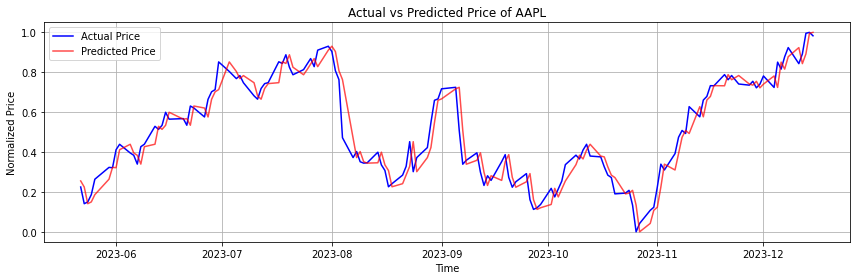

Mean Absolute Error (MAE): 1.6533
Mean Squared Error (MSE): 4.5690
Root Mean Squared Error (RMSE): 2.1375
R² Score: 0.9254


In [37]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import datetime as dt

final_df = pd.read_csv('final_dataset.csv')
sentiment_df = pd.read_csv('sentiment_score.csv')

sentiment_df["Date"] = pd.to_datetime(sentiment_df["Date"]).dt.date
final_df["Date"] = pd.to_datetime(final_df["Date"]).dt.date

avg_sentiment = sentiment_df.groupby(["Date", "Stock_symbol"])["sentiment_score"].mean().reset_index() if "Stock_symbol" in sentiment_df.columns else sentiment_df
sentiment_pivot = avg_sentiment.pivot(index="Date", columns="Stock_symbol", values="sentiment_score") if "Stock_symbol" in sentiment_df.columns else sentiment_df.set_index("Date")
sentiment_pivot.columns = [f"sentiment_{col}" for col in sentiment_pivot.columns] if "Stock_symbol" in sentiment_df.columns else ["sentiment_AAPL"]
merged_df = pd.merge(final_df, sentiment_pivot, on="Date", how="left")

stock = "AAPL"
features = [f"Close_{stock}", f"sentiment_{stock}"]
df = merged_df[["Date"] + features].dropna().copy()
df.set_index("Date", inplace=True)

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)

class StockDataset(Dataset):
    def __init__(self, data, window=4):
        self.X, self.y = [], []
        for i in range(len(data) - window):
            self.X.append(data[i:i+window])
            self.y.append(data[i+window][0])
        self.X = torch.tensor(self.X, dtype=torch.float32)
        self.y = torch.tensor(self.y, dtype=torch.float32).view(-1, 1)

    def __len__(self): return len(self.X)
    def __getitem__(self, idx): return self.X[idx], self.y[idx]

window_size = 4
train_data = scaled_data[:-1]
test_input = torch.tensor(scaled_data[-window_size:], dtype=torch.float32).unsqueeze(0)

train_dataset = StockDataset(train_data, window_size)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=False)

class TimeSeriesTransformer(nn.Module):
    def __init__(self, input_dim=2, d_model=64, nhead=4, num_layers=2, dim_feedforward=128):
        super().__init__()
        self.input_proj = nn.Linear(input_dim, d_model)
        encoder_layer = nn.TransformerEncoderLayer(d_model=d_model, nhead=nhead, dim_feedforward=dim_feedforward, batch_first=True)
        self.transformer = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)
        self.output_layer = nn.Linear(d_model, 1)

    def forward(self, x):
        x = self.input_proj(x)
        x = self.transformer(x)
        return self.output_layer(x[:, -1])

model = TimeSeriesTransformer(input_dim=2)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn = nn.MSELoss()

model.train()
for epoch in range(20):
    total_loss = 0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        preds = model(X_batch)
        loss = loss_fn(preds, y_batch)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    if epoch % 5 == 0:
        print(f"[Transformer] Epoch {epoch} - Loss: {total_loss:.4f}")

last_date = pd.to_datetime(df.index.max())
available_dates = sorted(set(final_df["Date"]))
future_dates = [d for d in available_dates if d > last_date.date()]
pred_date = future_dates[0] if future_dates else last_date.date()

model.eval()
with torch.no_grad():
    pred_scaled = model(test_input).item()
    predicted_price = scaler.inverse_transform([[pred_scaled, 0]])[0][0]

print(f"\nActual close price on {last_date.date()}: ${df.iloc[-1][f'Close_{stock}']:.2f}")
print(f"Predicted close price for {stock} on {pred_date}: ${predicted_price:.2f}")

price_col = f"Close_{stock}"
sentiment_col = f"sentiment_{stock}"
df = merged_df[["Date", price_col, sentiment_col]].dropna().copy()

scaler = MinMaxScaler()
scaled = scaler.fit_transform(df[[price_col, sentiment_col]])
df_scaled = pd.DataFrame(scaled, columns=[price_col, sentiment_col])
df_scaled["Date"] = df["Date"].values
df_scaled["Predicted"] = df_scaled[price_col].shift(1)
df_plot = df_scaled.dropna().copy()

plt.figure(figsize=(12, 4))
plt.plot(df_plot["Date"], df_plot[price_col], label="Actual Price", color="blue")
plt.plot(df_plot["Date"], df_plot["Predicted"], label="Predicted Price", color="red", alpha=0.7)
plt.xlabel("Time")
plt.ylabel("Normalized Price")
plt.title(f"Actual vs Predicted Price of {stock}")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

actual_prices = scaler.inverse_transform(df_plot[[price_col, sentiment_col]])[:, 0]
predicted_prices = scaler.inverse_transform(
    pd.concat([df_plot[["Predicted"]], df_plot[[sentiment_col]]], axis=1)
)[:, 0]

mse = mean_squared_error(actual_prices, predicted_prices)
rmse = np.sqrt(mse)
mae = mean_absolute_error(actual_prices, predicted_prices)
r2 = r2_score(actual_prices, predicted_prices)

print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")